**Image Prcoessing**

In [1]:
!pip install pillow

**Resizing & Normalization**

In [3]:
import os
from PIL import Image
import numpy as np

# Function to resize and normalize images
def process_image(image_path, output_path, target_size=(224, 224)):
    # Open an image file
    with Image.open(image_path) as img:
        # Resize image
        img = img.resize(target_size, Image.LANCZOS)
        # Normalize image (convert to numpy array and scale pixel values)
        img_array = np.array(img) / 255.0
        # Convert back to Image for saving
        img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
        # Save the processed image
        img_normalized.save(output_path)

# Function to process all images in a directory
def process_directory(input_dir, output_dir, target_size=(224, 224)):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse all files in the directory
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Full path of the current file
                image_path = os.path.join(root, file)
                # Corresponding output path
                relative_path = os.path.relpath(image_path, input_dir)
                output_path = os.path.join(output_dir, relative_path)
                # Ensure the output directory exists
                output_file_dir = os.path.dirname(output_path)
                if not os.path.exists(output_file_dir):
                    os.makedirs(output_file_dir)
                # Process the image
                process_image(image_path, output_path, target_size)
                
# Define input and output directories for each category
directories = {
    "bottoms": "C:\\Users\\Yashvi\\Hackerramp\\dataset\\bottoms",
    "shoes": "C:\\Users\\Yashvi\\Hackerramp\\dataset\\shoes",
    "jewellery": "C:\\Users\\Yashvi\\Hackerramp\\dataset\\jewellery",
    "tops": "C:\\Users\\Yashvi\\Hackerramp\\dataset\\tops"
}

output_base_dir = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset"

# Process each category directory
for category, input_dir in directories.items():
    output_dir = os.path.join(output_base_dir, category)
    process_directory(input_dir, output_dir)


**Feature Extraction**

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

def extract_features_from_directory(directory, save_path):
    all_features = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if img_path.endswith(('jpg', 'jpeg', 'png')):
            features = extract_features(img_path)
            all_features.append([filename] + features.tolist())
            print(f"Extracted features of {filename}")
    
    # Convert features list to DataFrame and save as CSV
    feature_df = pd.DataFrame(all_features)
    feature_df.to_csv(save_path, index=False)
    print(f"Saved features to {save_path}")

# Directories for images
base_dir = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset"
categories = {
    'bottoms': os.path.join(base_dir, 'bottoms'),
    'tops': os.path.join(base_dir, 'tops'),
    'shoes': os.path.join(base_dir, 'shoes'),
    'jewellery': os.path.join(base_dir, 'jewellery')
}

# Paths to save the extracted features
save_paths = {
    'bottoms': "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\bottoms_features.csv",
    'tops': "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\tops_features.csv",
    'shoes': "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\shoes_features.csv",
    'jewellery': "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\jewellery_features.csv"
}

# Extract and save features for each category
for category, dir_path in categories.items():
    extract_features_from_directory(dir_path, save_paths[category])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
Extracted features of image_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Extracted features of image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Extracted features of image_10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Extracted features of image_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Extracted features of image_1000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Extracted features of image_1001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Extracted features of image_1002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Extracted features of image_1003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Extracted features of image_1004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Extracted features of image_1005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Extracted features of image_1006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Extracted features of image_1007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Extracted features of image_1008.jpg
1/1 ━━━━━━━━━━━━━━━━━

**Similarity Calculation**

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Function to load features from a CSV file
def load_features_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    filenames = df.iloc[:, 0].values
    features = df.iloc[:, 1:].values
    return list(zip(filenames, features))

# Paths to the extracted features CSV files
bottoms_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\bottoms_features.csv"
tops_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\tops_features.csv"
shoes_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\shoes_features.csv"
jewellery_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\jewellery_features.csv"

# Load features from CSV files
bottoms_features = load_features_from_csv(bottoms_csv_path)
tops_features = load_features_from_csv(tops_csv_path)
shoes_features = load_features_from_csv(shoes_csv_path)
jewellery_features = load_features_from_csv(jewellery_csv_path)

# Function to compute similarity
def compute_similarity(feature_list_1, feature_list_2):
    similarities = {}
    for filename1, features1 in feature_list_1:
        for filename2, features2 in feature_list_2:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities[(filename1, filename2)] = similarity
    return similarities

# Compute similarities
bottom_top_similarities = compute_similarity(bottoms_features, tops_features)
bottom_shoes_similarities = compute_similarity(bottoms_features, shoes_features)
bottom_jewellery_similarities = compute_similarity(bottoms_features, jewellery_features)
tops_shoes_similarities = compute_similarity(tops_features, shoes_features)
tops_jewellery_similarities = compute_similarity(tops_features, jewellery_features)
shoes_jewellery_similarities = compute_similarity(shoes_features, jewellery_features)

# Example: Print some similarities
print("Similarity between bottoms and tops:")
for (bottom, top), similarity in list(bottom_top_similarities.items())[:5]:
    print(f"{bottom} <-> {top}: {similarity}")

print("\nSimilarity between bottoms and shoes:")
for (bottom, shoe), similarity in list(bottom_shoes_similarities.items())[:5]:
    print(f"{bottom} <-> {shoe}: {similarity}")

print("\nSimilarity between bottoms and jewellery:")
for (bottom, jewellery), similarity in list(bottom_jewellery_similarities.items())[:5]:
    print(f"{bottom} <-> {jewellery}: {similarity}")

print("\nSimilarity between tops and shoes:")
for (top, shoe), similarity in list(tops_shoes_similarities.items())[:5]:
    print(f"{top} <-> {shoe}: {similarity}")

print("\nSimilarity between tops and jewellery:")
for (top, jewellery), similarity in list(tops_jewellery_similarities.items())[:5]:
    print(f"{top} <-> {jewellery}: {similarity}")

print("\nSimilarity between shoes and jewellery:")
for (shoe, jewellery), similarity in list(shoes_jewellery_similarities.items())[:5]:
    print(f"{shoe} <-> {jewellery}: {similarity}")

Similarity between bottoms and tops:
image_0.jpg <-> image_0.jpg: 0.09876781277557906
image_0.jpg <-> image_1.jpg: 0.09320700451259167
image_0.jpg <-> image_10.jpg: 0.05606136839582228
image_0.jpg <-> image_100.jpg: 0.13084279308582122
image_0.jpg <-> image_1000.jpg: 0.13308421376531585

Similarity between bottoms and shoes:
image_0.jpg <-> image_0.jpg: 0.07190985048111086
image_0.jpg <-> image_1.jpg: 0.100539957270556
image_0.jpg <-> image_10.jpg: 0.0792488696179264
image_0.jpg <-> image_100.jpg: 0.0764252462214462
image_0.jpg <-> image_101.jpg: 0.04623254530348244

Similarity between bottoms and jewellery:
image_0.jpg <-> 1stdibs.com Contemporary-18K-Yellow-Gold-and-White-Diamon727772a6110edd5fcc8691395e2ec21f.jpg: 0.12873855836898324
image_0.jpg <-> 925concept.com Butterfly-Crystal-Stud-Earrings-Gold4815f5eb5de78afc3700de53c2e2080a.jpg: 0.06830383592492746
image_0.jpg <-> alixyang.com Macy-Hoops-Gold7eab26268473eb6ce26f85ee846bd103.jpg: 0.05833746191985341
image_0.jpg <-> alvjewels.

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Function to load features from a CSV file
def load_features_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    filenames = df.iloc[:, 0].values
    features = df.iloc[:, 1:].values
    return list(zip(filenames, features))

# Function to compute similarities between categories and save to a single CSV
def compute_and_save_all_similarities(bottoms_features, tops_features, shoes_features, jewellery_features, output_csv_path):
    similarities = []

    # Compute similarities between bottoms and other categories
    for filename1, features1 in bottoms_features:
        for filename2, features2 in tops_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('bottoms', 'tops', filename1, filename2, similarity))
        
        for filename2, features2 in shoes_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('bottoms', 'shoes', filename1, filename2, similarity))
        
        for filename2, features2 in jewellery_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('bottoms', 'jewellery', filename1, filename2, similarity))
    
    # Compute similarities between tops and other categories
    for filename1, features1 in tops_features:
        for filename2, features2 in shoes_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('tops', 'shoes', filename1, filename2, similarity))
        
        for filename2, features2 in jewellery_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('tops', 'jewellery', filename1, filename2, similarity))
    
    # Compute similarities between shoes and jewellery
    for filename1, features1 in shoes_features:
        for filename2, features2 in jewellery_features:
            similarity = cosine_similarity([features1], [features2])[0][0]
            similarities.append(('shoes', 'jewellery', filename1, filename2, similarity))

    # Save similarities to CSV
    df = pd.DataFrame(similarities, columns=['category1', 'category2', 'item1', 'item2', 'similarity'])
    df.to_csv(output_csv_path, index=False)

# Paths to the extracted features CSV files
bottoms_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\bottoms_features.csv"
tops_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\tops_features.csv"
shoes_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\shoes_features.csv"
jewellery_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\jewellery_features.csv"

# Load features from CSV files
bottoms_features = load_features_from_csv(bottoms_csv_path)
tops_features = load_features_from_csv(tops_csv_path)
shoes_features = load_features_from_csv(shoes_csv_path)
jewellery_features = load_features_from_csv(jewellery_csv_path)

# Compute and save all similarities to a single CSV file
compute_and_save_all_similarities(bottoms_features, tops_features, shoes_features, jewellery_features, "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\all_categories_similarities.csv")

# Example: Print some similarities (optional)
# Note: Adjust based on the structure of the 'similarities' list in your original code
# print("Example similarities:")
# for similarity in similarities[:5]:
#     print(similarity)


**Recommendations**

Loaded similarities DataFrame:
  category1 category2        item1           item2  similarity
0   bottoms      tops  image_0.jpg     image_0.jpg    0.098768
1   bottoms      tops  image_0.jpg     image_1.jpg    0.093207
2   bottoms      tops  image_0.jpg    image_10.jpg    0.056061
3   bottoms      tops  image_0.jpg   image_100.jpg    0.130843
4   bottoms      tops  image_0.jpg  image_1000.jpg    0.133084
Filtered DataFrame for tops:
     category1 category2         item1           item2  similarity
5956   bottoms      tops  image_10.jpg     image_0.jpg    0.109982
5957   bottoms      tops  image_10.jpg     image_1.jpg    0.049218
5958   bottoms      tops  image_10.jpg    image_10.jpg    0.311159
5959   bottoms      tops  image_10.jpg   image_100.jpg    0.143795
5960   bottoms      tops  image_10.jpg  image_1000.jpg    0.075566
...        ...       ...           ...             ...         ...
7450   bottoms      tops  image_10.jpg   image_995.jpg    0.071371
7451   bottoms      tops  

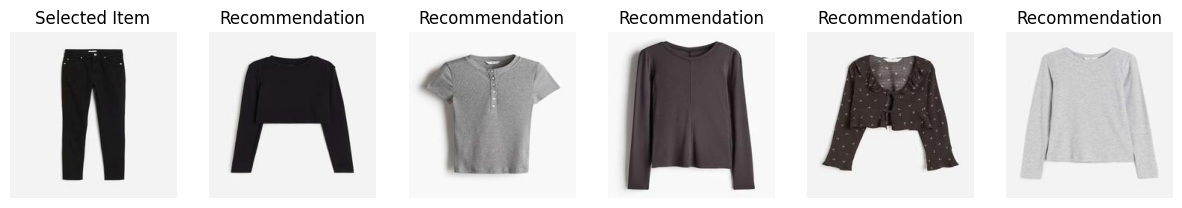

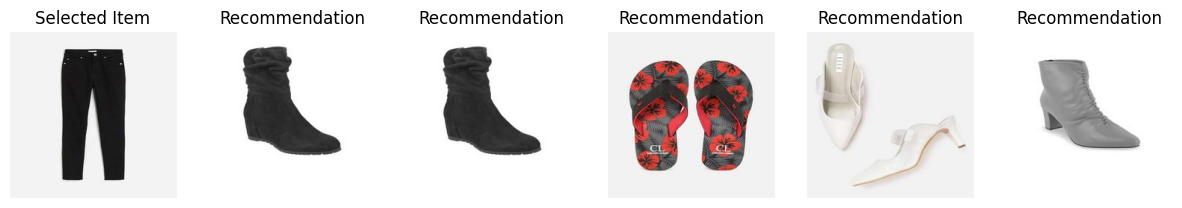

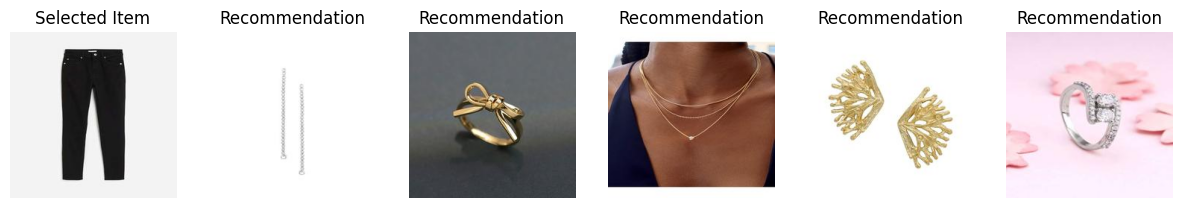

In [5]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Function to get top N recommendations based on similarity
def get_top_n_recommendations(similarities_df, selected_item, n, category2, directory):
    selected_item_basename = os.path.basename(selected_item)
    filtered_df = similarities_df[(similarities_df['item1'] == selected_item_basename) & (similarities_df['category2'] == category2)]
    print(f"Filtered DataFrame for {category2}:")
    print(filtered_df)
    sorted_df = filtered_df.sort_values(by='similarity', ascending=False)
    top_n_recommendations = sorted_df.head(n)
    return [os.path.join(directory, item) for item in top_n_recommendations['item2'].values.tolist()]

# Function to display recommendations
def display_recommendations(selected_item, recommendations):
    fig, axes = plt.subplots(1, len(recommendations) + 1, figsize=(15, 5))
    
    # Ensure axes is always a list
    if len(recommendations) == 0:
        axes = [axes]
    
    # Display the selected item
    selected_img_path = selected_item
    selected_img = Image.open(selected_img_path)
    axes[0].imshow(selected_img)
    axes[0].set_title('Selected Item')
    axes[0].axis('off')

    # Display the recommendations
    for i, recommendation in enumerate(recommendations):
        img_path = recommendation
        img = Image.open(img_path)
        axes[i+1].imshow(img)
        axes[i+1].set_title('Recommendation')
        axes[i+1].axis('off')

    plt.show()

# Path to the single CSV file with all similarities
similarities_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\all_categories_similarities.csv"

# Load similarities from CSV
similarities_df = pd.read_csv(similarities_csv_path)
print("Loaded similarities DataFrame:")
print(similarities_df.head())

# Selected bottom item and number of recommendations
selected_bottom = 'C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\bottoms\\image_10.jpg'  # Replace with the actual filename
n = 5 # Number of recommendations

# Directory paths for different categories
tops_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\tops"
shoes_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\shoes"
jewellery_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\jewellery"

# Get recommendations for tops, shoes, and jewellery
top_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'tops', tops_directory)
shoe_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'shoes', shoes_directory)
jewellery_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'jewellery', jewellery_directory)

# Display recommendations
print(f"Top recommendations for {selected_bottom}:")
print("Tops:", top_recommendations)
print("Shoes:", shoe_recommendations)
print("Jewellery:", jewellery_recommendations)

display_recommendations(selected_bottom, top_recommendations)
display_recommendations(selected_bottom, shoe_recommendations)
display_recommendations(selected_bottom, jewellery_recommendations)


Loaded similarities DataFrame:
  category1 category2        item1           item2  similarity
0   bottoms      tops  image_0.jpg     image_0.jpg    0.098768
1   bottoms      tops  image_0.jpg     image_1.jpg    0.093207
2   bottoms      tops  image_0.jpg    image_10.jpg    0.056061
3   bottoms      tops  image_0.jpg   image_100.jpg    0.130843
4   bottoms      tops  image_0.jpg  image_1000.jpg    0.133084
Filtered DataFrame for tops:
        category1 category2          item1           item2  similarity
1331166   bottoms      tops  image_140.jpg     image_0.jpg    0.071246
1331167   bottoms      tops  image_140.jpg     image_1.jpg    0.068983
1331168   bottoms      tops  image_140.jpg    image_10.jpg    0.182487
1331169   bottoms      tops  image_140.jpg   image_100.jpg    0.066713
1331170   bottoms      tops  image_140.jpg  image_1000.jpg    0.099483
...           ...       ...            ...             ...         ...
1332660   bottoms      tops  image_140.jpg   image_995.jpg    0.0

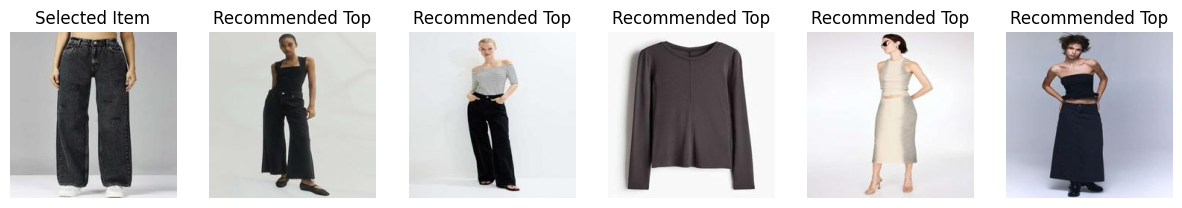

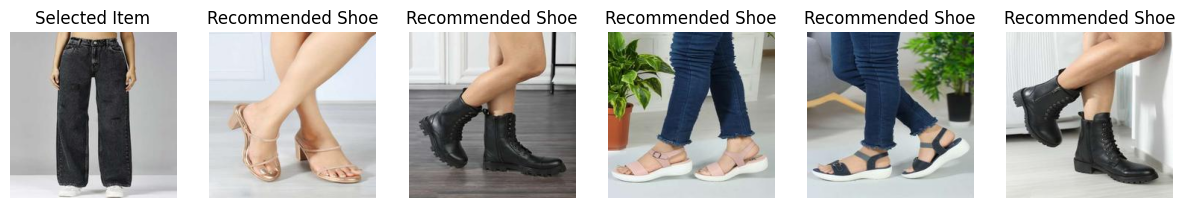

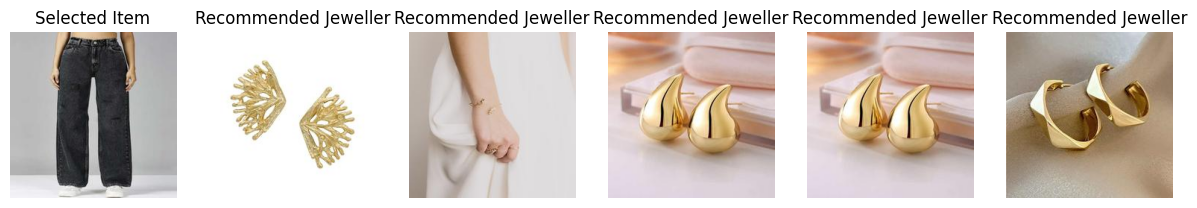

In [7]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Function to get top N recommendations based on similarity
def get_top_n_recommendations(similarities_df, selected_item, n, category2, directory):
    selected_item_basename = os.path.basename(selected_item)
    filtered_df = similarities_df[(similarities_df['item1'] == selected_item_basename) & (similarities_df['category2'] == category2)]
    print(f"Filtered DataFrame for {category2}:")
    print(filtered_df)
    sorted_df = filtered_df.sort_values(by='similarity', ascending=False)
    top_n_recommendations = sorted_df.head(n)
    unique_recommendations = []
    seen = set()
    for item in top_n_recommendations['item2'].values.tolist():
        if item not in seen:
            seen.add(item)
            unique_recommendations.append(os.path.join(directory, item))
        if len(unique_recommendations) == n:
            break
    return unique_recommendations

# Function to display recommendations
def display_recommendations(selected_item, recommendations, category):
    fig, axes = plt.subplots(1, len(recommendations) + 1, figsize=(15, 5))
    
    # Ensure axes is always a list
    if len(recommendations) == 0:
        axes = [axes]
    
    # Display the selected item
    selected_img_path = selected_item
    selected_img = Image.open(selected_img_path)
    axes[0].imshow(selected_img)
    axes[0].set_title('Selected Item')
    axes[0].axis('off')

    # Display the recommendations
    for i, recommendation in enumerate(recommendations):
        img_path = recommendation
        img = Image.open(img_path)
        axes[i+1].imshow(img)
        axes[i+1].set_title(f'Recommended {category[:-1].capitalize()}')
        axes[i+1].axis('off')

    plt.show()

# Path to the single CSV file with all similarities
similarities_csv_path = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\all_categories_similarities.csv"

# Load similarities from CSV
similarities_df = pd.read_csv(similarities_csv_path)
print("Loaded similarities DataFrame:")
print(similarities_df.head())

# Selected bottom item and number of recommendations
selected_bottom = 'C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\bottoms\\image_140.jpg'  # Replace with the actual filename
n = 5 # Number of recommendations

# Directory paths for different categories
tops_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\tops"
shoes_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\shoes"
jewellery_directory = "C:\\Users\\Yashvi\\Hackerramp\\processed_dataset\\jewellery"

# Get recommendations for tops, shoes, and jewellery
top_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'tops', tops_directory)
shoe_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'shoes', shoes_directory)
jewellery_recommendations = get_top_n_recommendations(similarities_df, selected_bottom, n, 'jewellery', jewellery_directory)

# Display recommendations
print(f"Top recommendations for {selected_bottom}:")
print("Tops:", top_recommendations)
print("Shoes:", shoe_recommendations)
print("Jewellery:", jewellery_recommendations)

display_recommendations(selected_bottom, top_recommendations, 'tops')
display_recommendations(selected_bottom, shoe_recommendations, 'shoes')
display_recommendations(selected_bottom, jewellery_recommendations, 'jewellery')
